In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
file_path = "/content/NIFTY 50.csv"
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date', dayfirst=True)

In [5]:
ts = df['Close'].astype(float).dropna()
print(df.head())

           Index Name      Open      High       Low     Close
Date                                                         
2025-02-14   NIFTY 50  23096.45  23133.70  22774.85  22929.25
2025-02-13   NIFTY 50  23055.75  23235.50  22992.20  23031.40
2025-02-12   NIFTY 50  23050.80  23144.70  22798.35  23045.25
2025-02-11   NIFTY 50  23383.55  23390.05  22986.65  23071.80
2025-02-10   NIFTY 50  23543.80  23568.60  23316.30  23381.60


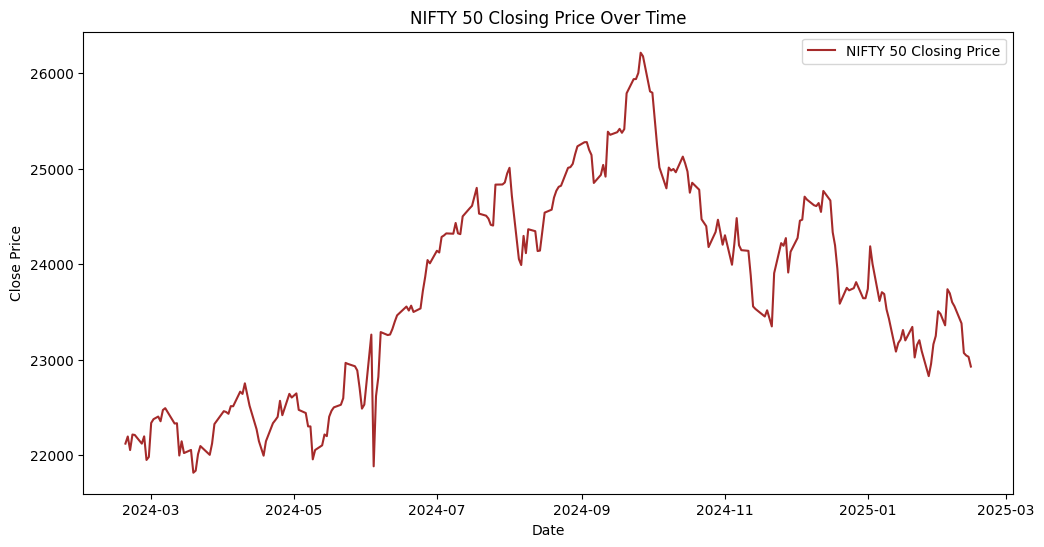

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(ts, label='NIFTY 50 Closing Price', color='brown')
plt.title('NIFTY 50 Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [9]:
adf_test = adfuller(ts)
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -0.9929480224408508
p-value: 0.7558276501947754


<Figure size 1200x600 with 0 Axes>

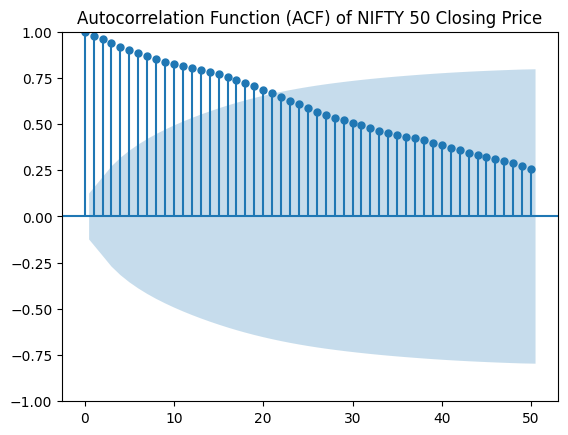

In [10]:
plt.figure(figsize=(12, 6))
plot_acf(ts, lags=50)
plt.title("Autocorrelation Function (ACF) of NIFTY 50 Closing Price")
plt.show()

<Figure size 1200x600 with 0 Axes>

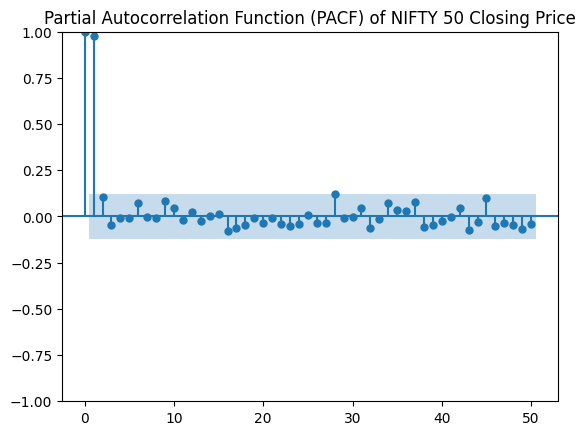

In [11]:
plt.figure(figsize=(12, 6))
plot_pacf(ts, lags=50)
plt.title("Partial Autocorrelation Function (PACF) of NIFTY 50 Closing Price")
plt.show()

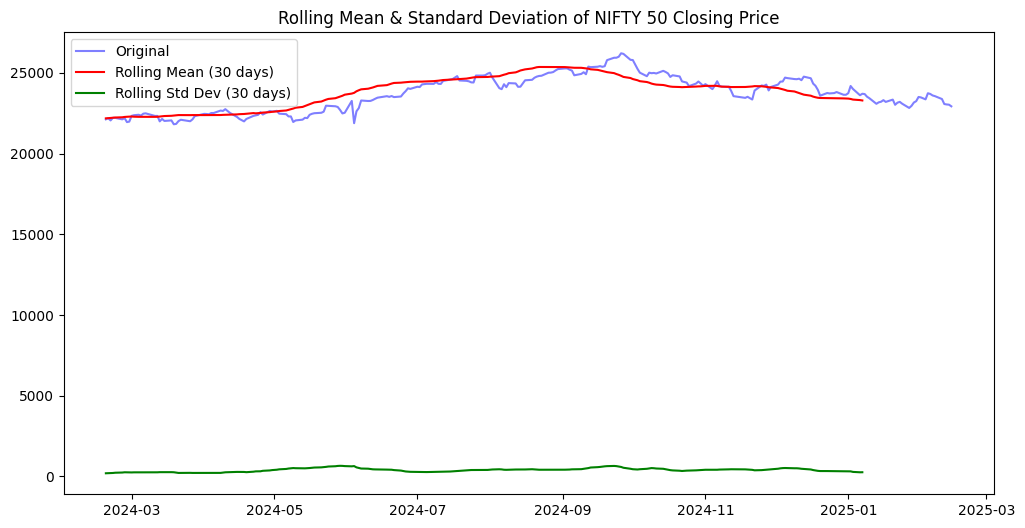

In [12]:
rolling_mean = ts.rolling(window=30).mean()
rolling_std = ts.rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original', color='blue', alpha=0.5)
plt.plot(rolling_mean, label='Rolling Mean (30 days)', color='red')
plt.plot(rolling_std, label='Rolling Std Dev (30 days)', color='green')
plt.title('Rolling Mean & Standard Deviation of NIFTY 50 Closing Price')
plt.legend()
plt.show()

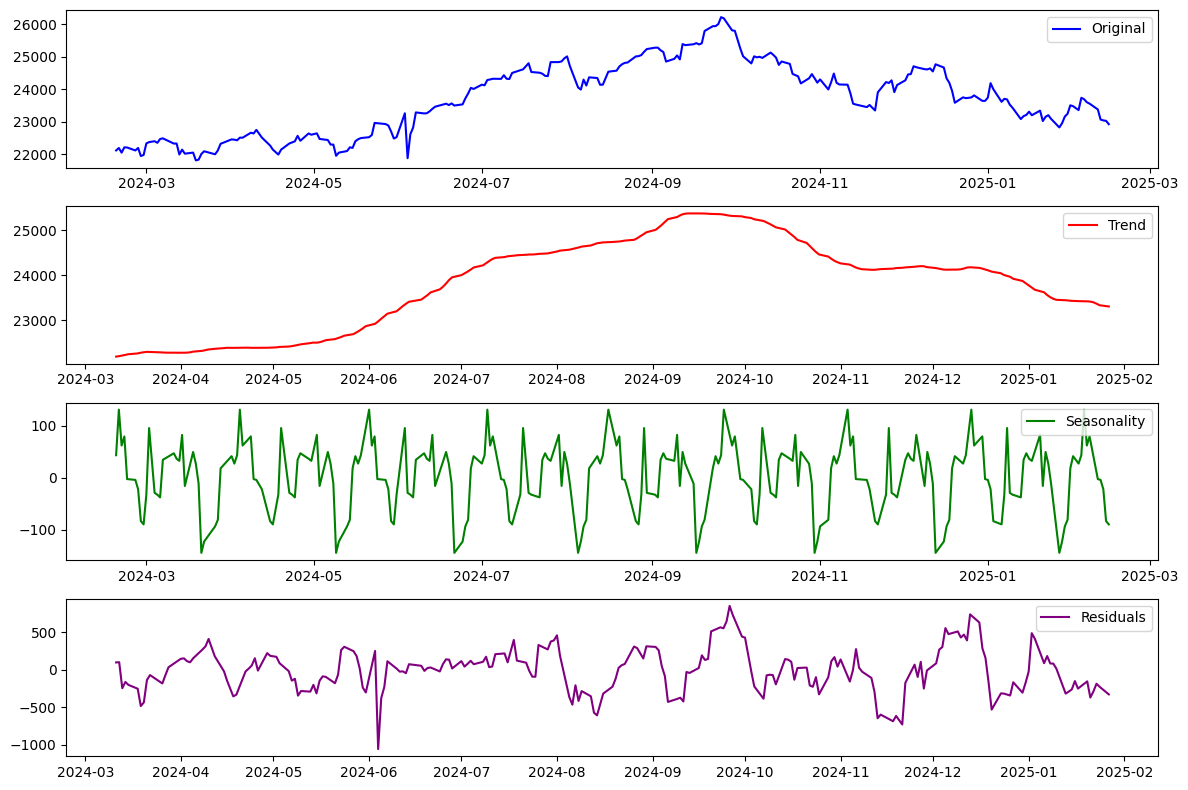

In [13]:
decomposition = seasonal_decompose(ts, model='additive', period=30)

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(ts, label='Original', color='blue')
plt.legend()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='red')
plt.legend()
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend()
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='purple')
plt.legend()
plt.tight_layout()
plt.show()